# Bring in data

In [2]:
import pandas as pd
import numpy as np
import dabl
import datetime

In [64]:
%matplotlib inline

In [3]:
Highways_schedule1=pd.read_csv('/Users/Lawrence/P6Activities.csv', encoding= 'unicode_escape')

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [209]:
Highways_schedule1

,DataDate,ProjectID,ActivityID,LocationCode,ActivityCode,ActualFinishDate,FreeFloat,Name,BaselineFinishDate,FinishDateVariance,ObjectId,PercentComplete,ProjectObjectId,Status,TotalFloat,EarlyFinishDate,LateFinishDate,Type,RemainingEarlyFinishDate,ExtractDate
0,14/05/2016,A14-S1-Current-Reporting,1ABDI-10000,NaN,NaN,NaN,0.0,Alconbury Brook diversion: EA approval obtained,28/10/2016,0.0,51725314,0.0,107430,Not Started,448.0,28/10/2016,30/01/2017,Finish Milestone,28/10/2016,07/09/2016
1,14/05/2016,A14-S1-Current-Reporting,1ABDI-10010,CUL1,NaN,NaN,0.0,Alconbury Brook diversion: build temporary cro...,11/11/2016,0.0,51725315,0.0,107430,Not Started,448.0,11/11/2016,13/02/2017,Task Dependent,11/11/2016,07/09/2016
2,14/05/2016,A14-S1-Current-Reporting,1ABDI-10020,CUL1,NaN,NaN,0.0,Alconbury Brook diversion: construct crane pla...,16/11/2016,0.0,51725316,0.0,107430,Not Started,448.0,16/11/2016,16/02/2017,Task Dependent,16/11/2016,07/09/2016
3,14/05/2016,A14-S1-Current-Reporting,1ABDI-10030,SEC1,NaN,NaN,0.0,Alconbury Brook diversion: remove Bailey bridge,23/11/2016,0.0,51725311,0.0,107430,Not Started,448.0,23/11/2016,23/02/2017,Task Dependent,23/11/2016,07/09/2016
4,14/05/2016,A14-S1-Current-Reporting,1ABDI-10040,SEC1,NaN,NaN,0.0,Alconbury Brook diversion: excavate new alignment,05/12/2016,0.0,51725310,0.0,107430,Not Started,448.0,05/12/2016,07/03/2017,Task Dependent,05/12/2016,07/09/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419548,30/09/2019,A14-S6-Current-Reporting,6VM-1800,SEC6,2702,01/01/1900,3256.0,VM69 - Site Works,31/01/2020,0.0,109461962,0.0,142818,Not Started,3256.0,31/01/2020,21/09/2021,Task Dependent,31/01/2020,04/10/2019
419549,30/09/2019,A14-S6-Current-Reporting,6VM-1810,SEC6,2702,26/04/2019,NaN,VM63aWest - Site Works,29/05/2019,168.0,109461116,1.0,142818,Completed,NaN,30/09/2019,26/03/2021,Task Dependent,01/01/1900,04/10/2019
419550,30/09/2019,A14-S6-Current-Reporting,6VM-1820,SEC6,2702,01/01/1900,528.0,VM63a - Site Works,09/01/2020,0.0,109461115,0.0,142818,Not Started,3320.0,09/01/2020,09/09/2021,Task Dependent,09/01/2020,04/10/2019
419551,30/09/2019,A14-S6-Current-Reporting,6VM-1870,SEC6,2702,17/05/2019,NaN,VM61a - Site Works (3 wks after VM62a - Strate...,25/06/2019,208.0,109461114,1.0,142818,Completed,NaN,30/09/2019,02/07/2021,Task Dependent,01/01/1900,04/10/2019


In [152]:
Highways_schedule = pd.read_csv('/Users/Lawrence/P6Activities.csv', encoding= 'unicode_escape')

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Highways_schedule.dtypes if needed

In [153]:
Highways_schedule['ExtractDate'] = pd.to_datetime(Highways_schedule['ExtractDate'])
Highways_schedule['DataDate'] = pd.to_datetime(Highways_schedule['DataDate'])
Highways_schedule['LocationCode'].astype('string')
Highways_schedule['BaselineFinishDate'] = pd.to_datetime(Highways_schedule['BaselineFinishDate'])

In [154]:
criteria = ((Highways_schedule['Status'] == 'Completed') | (Highways_schedule['Status'] == 'Not Started')) & (Highways_schedule['DataDate'] =='2019-09-30')

In [155]:
Highways_schedule=Highways_schedule[criteria]

In [156]:
Highways_schedule=Highways_schedule.drop(['DataDate','ActualFinishDate','FreeFloat','ObjectId','PercentComplete','ProjectObjectId','TotalFloat','EarlyFinishDate','LateFinishDate'],axis=1)

In [157]:
Highways_schedule=Highways_schedule.drop(['RemainingEarlyFinishDate','ExtractDate'],axis=1)

In [158]:
Highways_schedule['Reasonably_Delayed']=np.greater_equal(Highways_schedule['FinishDateVariance'], 5)

In [110]:
Highways_schedule.head()

,ProjectID,ActivityID,LocationCode,ActivityCode,Name,BaselineFinishDate,FinishDateVariance,Status,Type,Reasonably_Delayed
407526,A14-S1-Current-Reporting,1ABDI-10000,SEC1,3030,Alconbury Brook diversion: EA approval obtaine...,2017-07-21,240.0,Completed,Finish Milestone,True
407527,A14-S1-Current-Reporting,1ABDI-10010,PLM1,153,Alconbury Brook diversion: cast temporary brid...,2017-03-03,-56.0,Completed,Task Dependent,False
407528,A14-S1-Current-Reporting,1ABDI-10020,PLM1,153a,Alconbury Brook diversion: construct crane pla...,2017-03-03,8.0,Completed,Task Dependent,True
407529,A14-S1-Current-Reporting,1ABDI-10030,SEC1,202,Alconbury Brook diversion: remove Bailey bridg...,2017-07-26,8.0,Completed,Task Dependent,True
407530,A14-S1-Current-Reporting,1ABDI-10040,SEC1,602,Alconbury Brook diversion: excavate new alignment,2017-09-22,-120.0,Completed,Task Dependent,False


In [159]:
Clean_Highways_schedule= dabl.clean(Highways_schedule, verbose=0) # this uses DABL to tidy the dataset

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['ActivityCode_153a', 'ActivityCode_153c', 'ActivityCode_153d', 'ActivityCode_153e', 'ActivityCode_153f', 'ActivityCode_PRLM']
  near_constant.index[near_constant].tolist()))


In [ ]:
# print(dabl.detect_types(Clean_Highways_schedule))

# Prepare training dataset

In [160]:
#ignore 'in progress' tasks
Clean_Highways_schedule.set_index("Status", inplace=True)
Training_set=Clean_Highways_schedule.loc['Completed']
Run_time_set=Clean_Highways_schedule.loc['Not Started']

In [161]:
Training_set.reset_index(inplace=True)
Run_time_set.reset_index(inplace=True)

# Exploratory Data analyis
- "quick insight in to what are the important features, their interactions, and how hard the problem might be." 
- "allows a good assessment of whether there is any data leakage through spurious representations of the target in the data."
- as explained [here](https://amueller.github.io/dabl/dev/user_guide.html)

*Consider what to drop, based on what information we will have when we are making a prediction*
we have to take care to exclude columns that either:
- are a proxy for what we know about how late the task actually was
- and/or to exclude columns that will not have meaningful data which we can ask  of the Run-time data set. 

We use DABL plot API in two ways below. 
- we say we are interested in what is Reasonably Delayed, which is a Yes/No categorical question
- then we say we are interested in how long a task will take, which is a regression question

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/supervised.py:528: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Status', 'ActivityCode_153a', 'ActivityCode_153c', 'ActivityCode_153d', 'ActivityCode_153e', 'ActivityCode_153f', 'ActivityCode_PRLM']
  near_constant.index[near_constant].tolist()))


Target looks like classification


/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


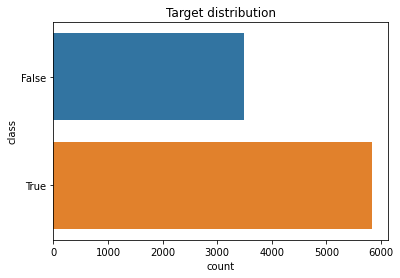

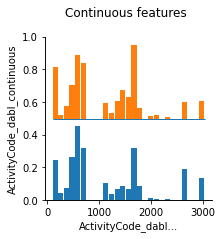

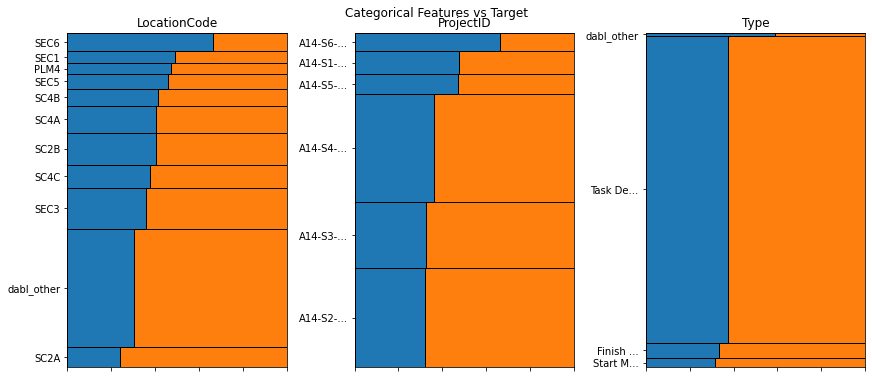

In [162]:
dabl.plot(Training_set.drop(['FinishDateVariance'], axis=1),'Reasonably_Delayed')

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/supervised.py:528: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Status', 'ActivityCode_153a', 'ActivityCode_153c', 'ActivityCode_153d', 'ActivityCode_153e', 'ActivityCode_153f', 'ActivityCode_PRLM']
  near_constant.index[near_constant].tolist()))


Target looks like regression


/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/plot/utils.py:364: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


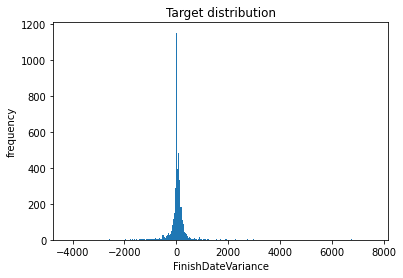

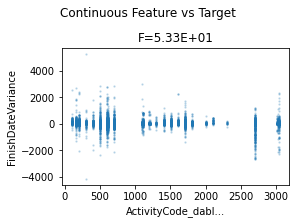

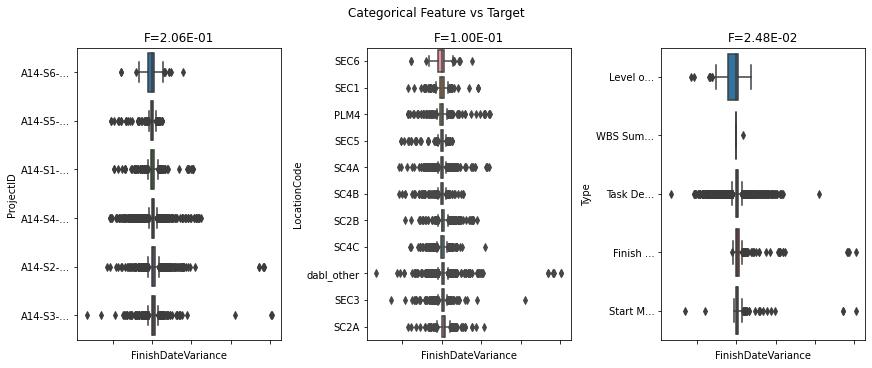

In [163]:
dabl.plot(Training_set.drop(["Reasonably_Delayed"],axis=1), 'FinishDateVariance')

# Train a Classification model

In [164]:
Highways_classification_model=dabl.SimpleClassifier (random_state=0)

In [165]:
X=Training_set.drop(['FinishDateVariance','Reasonably_Delayed'], axis=1)

In [166]:
y=Training_set["Reasonably_Delayed"]

In [167]:
Highways_classification_model.fit(X,y)

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Status', 'ActivityCode_153a', 'ActivityCode_153c', 'ActivityCode_153d', 'ActivityCode_153e', 'ActivityCode_153f', 'ActivityCode_PRLM']
  near_constant.index[near_constant].tolist()))


Running DummyClassifier(strategy='prior')
accuracy: 0.626 average_precision: 0.374 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.385
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.626 average_precision: 0.374 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.385

Running GaussianNB()
accuracy: 0.480 average_precision: 0.303 roc_auc: 0.622 recall_macro: 0.558 f1_macro: 0.463
=== new best GaussianNB() (using recall_macro):
accuracy: 0.480 average_precision: 0.303 roc_auc: 0.622 recall_macro: 0.558 f1_macro: 0.463

Running MultinomialNB()
accuracy: 0.637 average_precision: 0.298 roc_auc: 0.628 recall_macro: 0.562 f1_macro: 0.551
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.637 average_precision: 0.298 roc_auc: 0.628 recall_macro: 0.562 f1_macro: 0.551

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.644 average_precision: 0.359 roc_auc: 0.534 recall_macro: 0.534 f1_macro: 0.472
Running DecisionTreeClassifie

SimpleClassifier(random_state=0)

# Show how well this model does on the Training Set

In [168]:
y_predicted = Highways_classification_model.predict(X)

In [169]:
a=pd.DataFrame(y_predicted)

In [170]:
b=pd.DataFrame(y)

In [171]:
c=pd.merge(a,b,left_index=True,right_index=True)

In [172]:
c.columns = ['Prediction', 'Actual']

In [173]:
c['Matches']=(c['Prediction']==c['Actual'])

In [174]:
c.sort_values(['Matches'])

,Prediction,Actual,Matches
0,False,True,False
7303,False,True,False
3430,True,False,False
3431,True,False,False
7301,False,True,False
...,...,...,...
3967,True,True,True
3966,True,True,True
3965,True,True,True
3976,True,True,True


*now use boolean indexing (which looks at values rather than rows/cols) to show which it predicted correctly

In [175]:
s=c['Matches']

In [176]:
c[s]

,Prediction,Actual,Matches
1,False,False,True
4,False,False,True
7,False,False,True
8,False,False,True
10,False,False,True
...,...,...,...
9322,False,False,True
9323,False,False,True
9324,False,False,True
9325,False,False,True


# Make predictions for the run-time set

- One extra step before this would be to split out a third set, a test set, after the training set
- *need to check that the new dataframe 'Predicted_delays' below has kept consistent indexing up to that point*

In [177]:
X=Run_time_set.drop(["FinishDateVariance","Reasonably_Delayed"], axis=1)

In [178]:
X.head()

,Status,ProjectID,ActivityID,LocationCode,Name,BaselineFinishDate,Type,ActivityCode_153a,ActivityCode_153c,ActivityCode_153d,ActivityCode_153e,ActivityCode_153f,ActivityCode_PRLM,ActivityCode_dabl_continuous
0,Not Started,A14-S1-Current-Reporting,1COMM-10100,SEC1,Completion date for Section 1 (IAN 182 -Stage C),2019-10-17,Finish Milestone,0.0,0.0,0.0,0.0,0.0,0.0,1501.0
1,Not Started,A14-S1-Current-Reporting,1COMM-11000,SEC1,Start of Variable Mandatory Speed Limits - Man...,2019-02-12,Start Milestone,0.0,0.0,0.0,0.0,0.0,0.0,1507.0
2,Not Started,A14-S1-Current-Reporting,1COMM-11020,SEC1,MTV Plots,2019-06-12,Task Dependent,0.0,0.0,0.0,0.0,0.0,0.0,1504.0
3,Not Started,A14-S1-Current-Reporting,1COMM-11030,SEC1,Review MTV Plots,2019-12-13,Task Dependent,0.0,0.0,0.0,0.0,0.0,0.0,1504.0
4,Not Started,A14-S1-Current-Reporting,1COMM-11040,SEC1,Enable HIOCC: Start of Variable Mandatory Spee...,2019-12-13,WBS Summary,0.0,0.0,0.0,0.0,0.0,0.0,1507.0


In [179]:
y_predicted = Highways_classification_model.predict(X)

In [180]:
a=pd.DataFrame(y_predicted,columns=['Reasonably_Delayed_PREDICTION'])

In [32]:
#Run_time_set1=Run_time_set.drop(['Baseline Finish Date','FractionDelay','Reasonably_Delayed'],axis=1)

In [181]:
Predicted_delays=pd.merge(Run_time_set,a,left_index=True,right_index=True)

In [182]:
Predicted_delays

,Status,ProjectID,ActivityID,LocationCode,Name,BaselineFinishDate,FinishDateVariance,Type,Reasonably_Delayed,ActivityCode_153a,ActivityCode_153c,ActivityCode_153d,ActivityCode_153e,ActivityCode_153f,ActivityCode_PRLM,ActivityCode_dabl_continuous,Reasonably_Delayed_PREDICTION
0,Not Started,A14-S1-Current-Reporting,1COMM-10100,SEC1,Completion date for Section 1 (IAN 182 -Stage C),2019-10-17,0.0,Finish Milestone,False,0.0,0.0,0.0,0.0,0.0,0.0,1501.0,False
1,Not Started,A14-S1-Current-Reporting,1COMM-11000,SEC1,Start of Variable Mandatory Speed Limits - Man...,2019-02-12,0.0,Start Milestone,False,0.0,0.0,0.0,0.0,0.0,0.0,1507.0,False
2,Not Started,A14-S1-Current-Reporting,1COMM-11020,SEC1,MTV Plots,2019-06-12,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,False
3,Not Started,A14-S1-Current-Reporting,1COMM-11030,SEC1,Review MTV Plots,2019-12-13,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,False
4,Not Started,A14-S1-Current-Reporting,1COMM-11040,SEC1,Enable HIOCC: Start of Variable Mandatory Spee...,2019-12-13,0.0,WBS Summary,False,0.0,0.0,0.0,0.0,0.0,0.0,1507.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,Not Started,A14-S6-Current-Reporting,6VM-1560,SEC6,VM61 - Site Works,2020-10-19,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,2702.0,False
2458,Not Started,A14-S6-Current-Reporting,6VM-1590,SEC6,VM64 - Site Works,2021-04-20,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,2702.0,False
2459,Not Started,A14-S6-Current-Reporting,6VM-1620,SEC6,VM63 - Site Works (Spare Duct),2019-06-12,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,2702.0,False
2460,Not Started,A14-S6-Current-Reporting,6VM-1800,SEC6,VM69 - Site Works,2020-01-31,0.0,Task Dependent,False,0.0,0.0,0.0,0.0,0.0,0.0,2702.0,False


# Train a Regression model

In [184]:
Highways_regression_model=dabl.SimpleRegressor(random_state=0)

In [185]:
X=Training_set.drop(["Reasonably_Delayed",'FinishDateVariance'], axis=1) 

In [186]:
y=Training_set['FinishDateVariance']

In [187]:
Highways_regression_model.fit(X,y)

/Users/lawrence/DABL_Env/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Status', 'ActivityCode_153a', 'ActivityCode_153c', 'ActivityCode_153d', 'ActivityCode_153e', 'ActivityCode_153f', 'ActivityCode_PRLM']
  near_constant.index[near_constant].tolist()))


Running DummyRegressor()
r2: -0.001 neg_mean_squared_error: -170888.704
=== new best DummyRegressor() (using r2):
r2: -0.001 neg_mean_squared_error: -170888.704

Running DecisionTreeRegressor(max_depth=1)
r2: -0.003 neg_mean_squared_error: -170596.113
Running DecisionTreeRegressor(max_depth=5)
r2: 0.112 neg_mean_squared_error: -149961.991
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.112 neg_mean_squared_error: -149961.991

Running Ridge(alpha=10)
r2: 0.039 neg_mean_squared_error: -163171.299
Running Lasso(alpha=10)
r2: 0.013 neg_mean_squared_error: -168739.500

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.112 neg_mean_squared_error: -149961.991


SimpleRegressor(random_state=0)

# Show how well this model does on the Training Set

In [188]:
y_predicted = Highways_regression_model.predict(X)

In [192]:
a=pd.DataFrame(y_predicted,columns=['PredictedVariance'])

In [193]:
b=pd.DataFrame(Training_set['FinishDateVariance'])

In [194]:
c=pd.merge(a,b,left_index=True,right_index=True)

In [195]:
c

,PredictedVariance,FinishDateVariance
0,20.933333,240.0
1,37.771835,-56.0
2,37.771835,8.0
3,37.771835,8.0
4,37.771835,-120.0
...,...,...
9327,37.771835,16.0
9328,37.771835,16.0
9329,20.933333,168.0
9330,20.933333,208.0


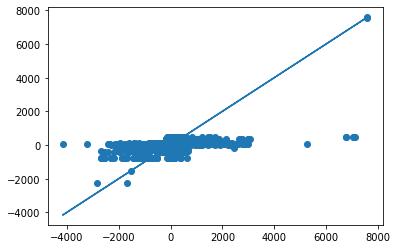

In [196]:
import matplotlib.pyplot as plt

plt.scatter(c['FinishDateVariance'],c['PredictedVariance'])
plt.plot(c['FinishDateVariance'],c['FinishDateVariance'])
plt.show()

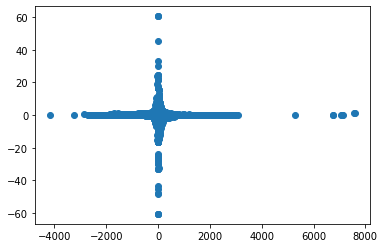

In [197]:
plt.scatter(c['FinishDateVariance'],c['PredictedVariance']/c['FinishDateVariance'])
plt.show()

# Make predictions for the run-time set

In [198]:
X=Run_time_set.drop(["Reasonably_Delayed",'FinishDateVariance'], axis=1)

In [199]:
y_predicted = Highways_regression_model.predict(X)

In [48]:
# compared with ...

In [200]:
a=pd.DataFrame(y_predicted,columns=['Predicted Variance'])

In [201]:
b=pd.DataFrame(Run_time_set['FinishDateVariance'])

In [202]:
c=pd.merge(a,b,left_index=True,right_index=True)

In [203]:
c

,Predicted Variance,FinishDateVariance
0,55.945578,0.0
1,37.771835,0.0
2,37.771835,0.0
3,37.771835,0.0
4,37.771835,0.0
...,...,...
2457,20.933333,0.0
2458,20.933333,0.0
2459,20.933333,0.0
2460,20.933333,0.0


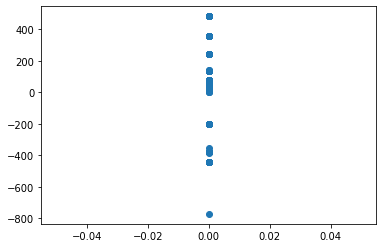

In [204]:
plt.scatter(c['FinishDateVariance'],c['Predicted Variance'])
plt.plot(c['FinishDateVariance'],c['FinishDateVariance'])
plt.show()

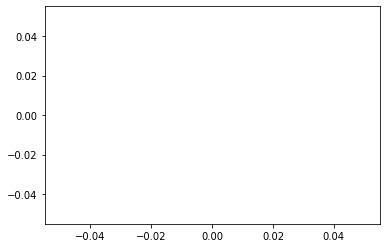

In [206]:
plt.scatter(c['FinishDateVariance'],c['Predicted Variance']/c['FinishDateVariance'])
plt.show()